In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

from pathlib import Path
from dataclasses import dataclass
from typing import Tuple, Callable

import forward as fwd

In [6]:
@dataclass
class Info:
    name: str
    lim: Tuple[Tuple[float, float], Tuple[float, float]]
    xy_star: np.ndarray
    objective: Callable[[np.ndarray, np.ndarray], float]

In [7]:
metrics_dir = Path("../_metrics")
script_metrics = [ d for d in metrics_dir.iterdir() if d.is_dir()]
blocks = { 
    script.stem : {
        path.stem : pd.read_csv(path) for path in script.iterdir() if path.suffix == ".csv"
    } 
    for script in script_metrics
}

infos = {
    'beale': Info(
        name = 'beale',
        lim = ((-0.2, 3.2),(-0.5, 0.8)),
        xy_star = np.array([3., 0.5]),
        objective = fwd.objectives.beale
    ),
    'rosenbrock': Info(
        name = 'rosenbrock',
        lim = ((-1.2, 1.2),(-0.3, 1.2)),
        xy_star = np.array([1., 1.]),
        objective = fwd.objectives.rosenbrock
    )
}

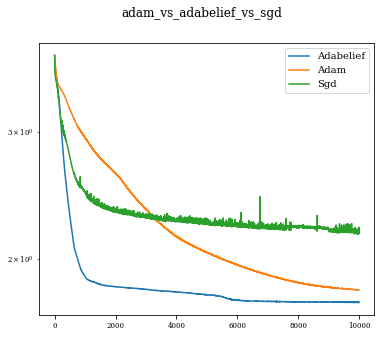

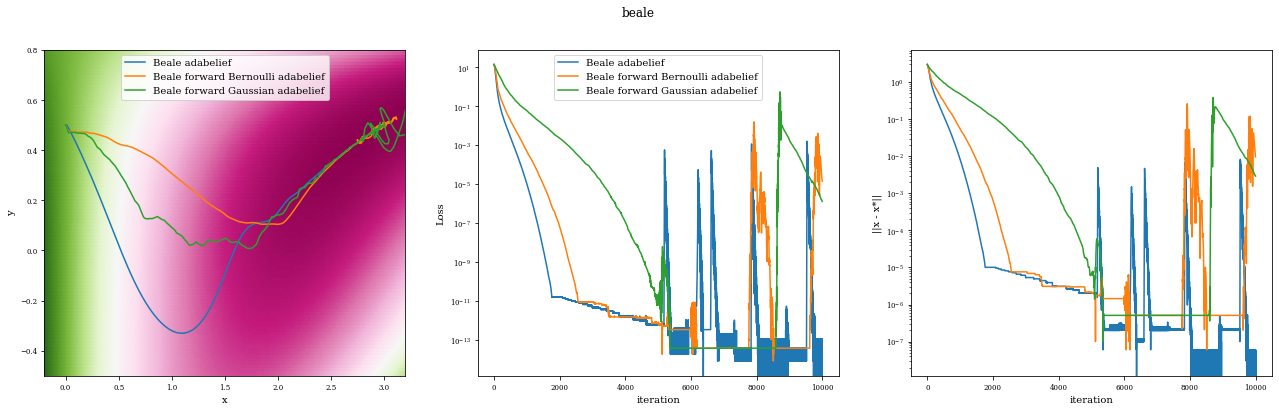

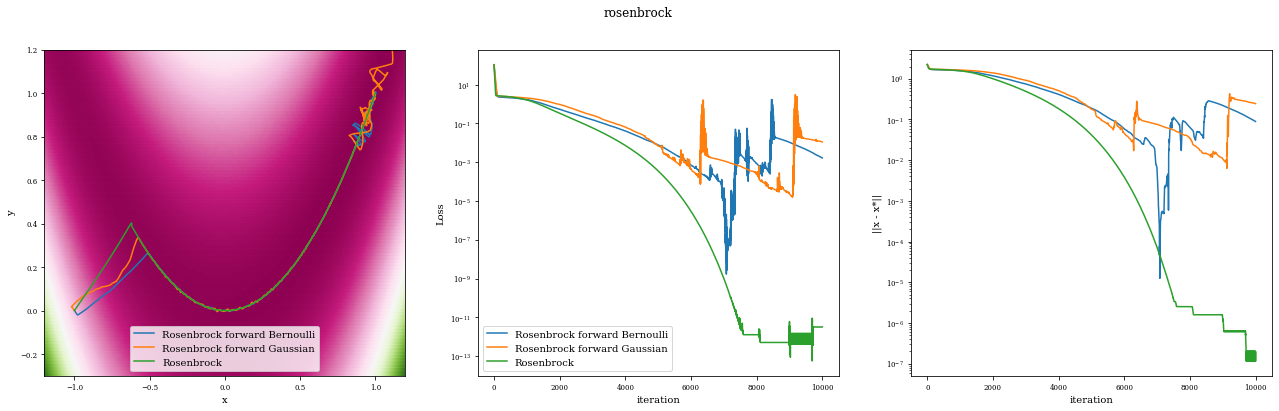

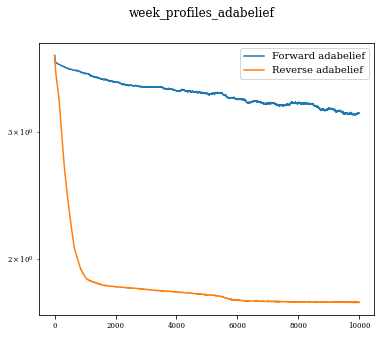

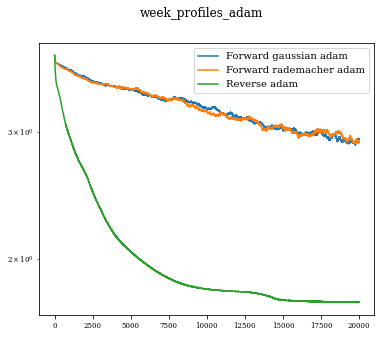

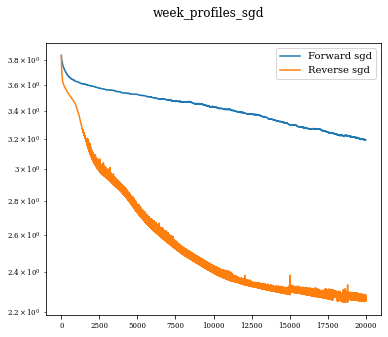

In [8]:
for name, block in blocks.items():
    if name in infos:
        fig, axs = plt.subplots(1, 3, figsize=(22, 6))
        fig.suptitle(name)
        
        info = infos[name]
        
        X, Y = np.meshgrid(np.linspace(*info.lim[0], 200), np.linspace(*info.lim[1], 100))
        axs[0].scatter(X, Y, marker=".", c=(info.objective(X, Y)), cmap="PiYG")
        
        for name, descent in block.items():
            theta_hist = np.stack([descent.x, descent.y])
            axs[0].plot(*theta_hist, label=name)

        axs[0].set_xlim(*info.lim[0])
        axs[0].set_ylim(*info.lim[1])
        axs[0].set_xlabel("x")
        axs[0].set_ylabel("y")
        axs[0].legend()
        
        for name, descent in block.items():
            theta_hist = np.stack([descent.x, descent.y])
            axs[2].semilogy(np.sqrt(np.sum((theta_hist - info.xy_star[:, None])**2, axis=0)))
        axs[2].set_ylabel("||x - x*||")
        axs[2].set_xlabel("iteration")
        
        for name, descent in block.items():
            axs[1].semilogy(descent.Loss, label=name)
        axs[1].set_ylabel("Loss")
        axs[1].set_xlabel("iteration")
        axs[1].legend()
        
        plt.show()
    
    else:
        n_plot = min(2, max([len(descent.columns) for descent in block.values()]))
        fig, axs = plt.subplots(1, n_plot, squeeze=False, figsize=(6*n_plot, 5))
        fig.suptitle(name)
        for name, descent in block.items():
            axs[0,0].semilogy(descent.Loss, label=name)
            for column in descent.columns:
                if column != "Loss":
                    axs[0,1].plot(descent[column], label=column)
        axs[0,0].legend()
        if n_plot > 1:
            axs[0,1].legend()
        plt.show()    